## Capstone Assignment - AAA Northeast Member Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot

### EDA

In [2]:
data = pd.read_csv('member_sample.csv')
data.head()

,Unnamed: 0,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [3]:
data.dtypes

Unnamed: 0                     int64
Individual Key               float64
Household Key                float64
Member Flag                   object
City                          object
                              ...   
Tow Destination Latitude     float64
Tow Destination Longitude    float64
Tow Destination Name          object
Was Duplicated               float64
Was Towed To AAR Referral    float64
Length: 113, dtype: object

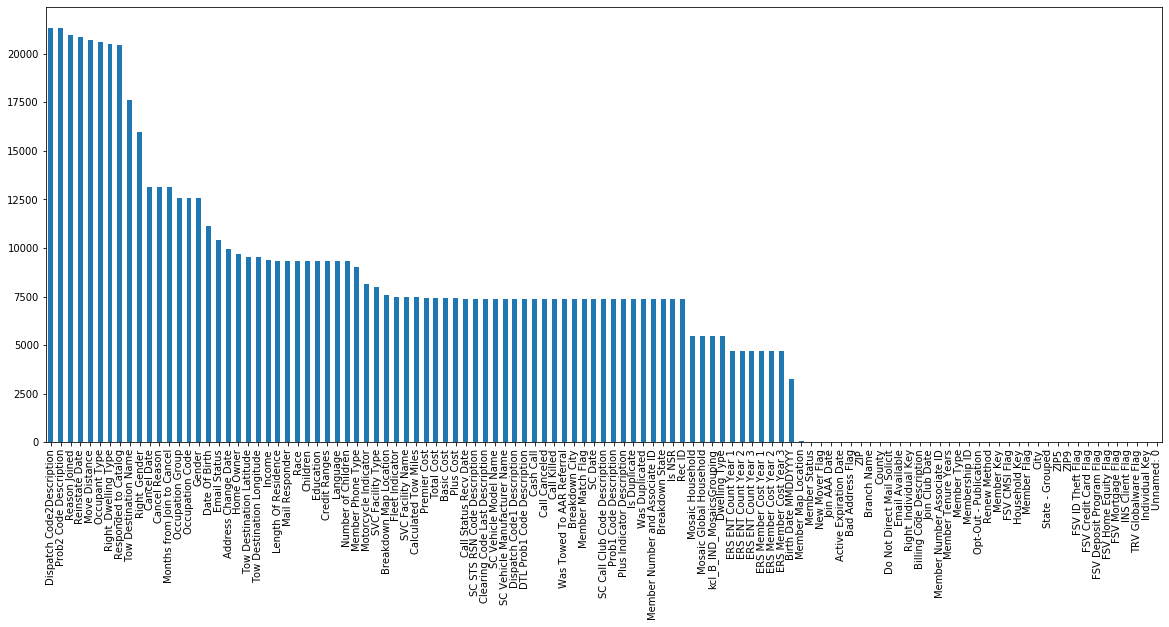

In [4]:
data.isnull().sum().nlargest(150).plot(kind='bar', figsize=(20,8))

In [5]:
products = ['FSV CMSI Flag', 'FSV Credit Card Flag', 'FSV Deposit Program Flag', 'FSV Home Equity Flag', 'FSV ID Theft Flag', 'FSV Mortgage Flag', 'INS Client Flag', 'TRV Globalware Flag']
products_name = ['Car Loan Sales', 'Credit Card Sales', 'Deposit Program Sales', 'Home Equity Sales', 'ID Theft Sales', 'Mortgage Sales', 'Insurance Sales', 'Travel Sales']
product_num = 1
product = products[product_num]


In [6]:
data.groupby(['Household Key', 'Gender', 'Income', 'Credit Ranges', 'Education', 'Member Tenure Years', 'Number of Children', 'Date Of Birth'])[product].value_counts().nlargest(50)

Household Key  Gender  Income         Credit Ranges  Education          Member Tenure Years  Number of Children  Date Of Birth        FSV Credit Card Flag
2692620.0      Male    90-99,999      650-699        Unknown            18.0                 Two Children        1984-10-28 00:00:00  N                       21
3884730.0      Male    100-149,999    700-749        Unknown            34.0                 One Child           1956-11-09 00:00:00  N                       17
18499078.0     Male    200 - 249,999  800+           Some College       46.0                 Two Children        1956-11-06 00:00:00  N                       17
2044209.0      Male    70-79,999      650-699        Graduated School   49.0                 One Child           1933-09-22 00:00:00  N                       15
5811875.0      Female  90-99,999      750-799        Unknown            13.0                 Three Children      1981-04-13 00:00:00  N                       15
15685337.0     Male    30-39,999      65

In [7]:
#cc_data = data[['Household Key', 'Gender', 'Income', 'Race', 'FSV CMSI Flag']].drop_duplicates().dropna()
fin_prod_data = data[['Gender', 'Income', 'Credit Ranges', 'Education', 'Member Tenure Years', 'Number of Children', 'Date Of Birth', product]].drop_duplicates().dropna()
fin_prod_data['Date Of Birth'] = fin_prod_data['Date Of Birth'].str[:4].astype('int64').round(0)
print(fin_prod_data.shape)
fin_prod_data.head()

(3139, 8)


,Gender,Income,Credit Ranges,Education,Member Tenure Years,Number of Children,Date Of Birth,FSV Credit Card Flag
20,Male,"50-59,999",650-699,Some College,59.0,No children,1935,N
22,Female,"100-149,999",650-699,Unknown,27.0,One Child,1965,N
26,Female,"100-149,999",650-699,Unknown,4.0,One Child,1938,N
28,Female,"100-149,999",800+,Unknown,42.0,Three Children,1949,N
32,Male,"150 - 174,999",750-799,Some College,59.0,One Child,1941,N


In [8]:
print(fin_prod_data.isna().sum())
print("Before dropping NaNs: {}".format(fin_prod_data.shape))
print("After dropping NaNs: {}".format(fin_prod_data.dropna().shape))
fin_prod_data.shape

Gender                  0
Income                  0
Credit Ranges           0
Education               0
Member Tenure Years     0
Number of Children      0
Date Of Birth           0
FSV Credit Card Flag    0
dtype: int64
Before dropping NaNs: (3139, 8)
After dropping NaNs: (3139, 8)


(3139, 8)

In [20]:
# Encode categorical features
fin_prod_data_onehot = fin_prod_data.copy()
fin_prod_data_onehot = pd.get_dummies(fin_prod_data_onehot, columns=['Gender', 'Income', 'Credit Ranges', 'Education', 'Number of Children', product], prefix = ['Gender', 'Income', 'Credit Ranges', 'Education', 'Number of Children', product])
fin_prod_data_onehot.head()

# Define features and target
X = fin_prod_data_onehot.drop(columns=[product+"_N", product+"_Y"])
y = fin_prod_data_onehot[[product+"_Y"]]
print(y.shape)

features = np.array(X.columns)
print(features)
#X.groupby(['Household Key'])
X.head()

(3139, 1)
['Member Tenure Years' 'Date Of Birth' 'Gender_Female' 'Gender_Male'
 'Income_10-19,999' 'Income_100-149,999' 'Income_150 - 174,999'
 'Income_175 - 199,999' 'Income_20-29,999' 'Income_200 - 249,999'
 'Income_250K+' 'Income_30-39,999' 'Income_40-49,999' 'Income_50-59,999'
 'Income_60-69,999' 'Income_70-79,999' 'Income_80-89,999'
 'Income_90-99,999' 'Income_Under 10K' 'Credit Ranges_499 & Less'
 'Credit Ranges_500-549' 'Credit Ranges_550-599' 'Credit Ranges_600-649'
 'Credit Ranges_650-699' 'Credit Ranges_700-749' 'Credit Ranges_750-799'
 'Credit Ranges_800+' 'Credit Ranges_Unknown'
 'Education_Completed College' 'Education_Graduated School'
 'Education_High School' 'Education_Some College' 'Education_Unknown'
 'Number of Children_Five Children' 'Number of Children_Four Children'
 'Number of Children_No children' 'Number of Children_One Child'
 'Number of Children_Six Children' 'Number of Children_Three Children'
 'Number of Children_Two Children']


,Member Tenure Years,Date Of Birth,Gender_Female,Gender_Male,"Income_10-19,999","Income_100-149,999","Income_150 - 174,999","Income_175 - 199,999","Income_20-29,999","Income_200 - 249,999",...,Education_High School,Education_Some College,Education_Unknown,Number of Children_Five Children,Number of Children_Four Children,Number of Children_No children,Number of Children_One Child,Number of Children_Six Children,Number of Children_Three Children,Number of Children_Two Children
20,59.0,1935,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
22,27.0,1965,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
26,4.0,1938,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
28,42.0,1949,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
32,59.0,1941,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [21]:
# Feature correlation matrix
#plt.figure(figsize=(20,10))
#cm = fin_prod_data_onehot.corr()
#sns.heatmap(cm, cmap='BrBG', annot=True)
#cm

### Classification Model

In [26]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.25, random_state=0)

def clf_fit(X_train, y_train, classifier):
    # Fit classifier
    clf = classifier
    clf.fit(X_train, y_train)
    return clf

def plot_feature_importance(importance, title):
    # Summarize feature importance
    for i, v in enumerate(importance):
        print('%s: %0d, Score: %.5f' % (importance[i], i, v))
    # Plot feature importance
    labels = [features[i].split('_')[1] for i in range(len(features))]
    labels2 = [labels[i][1:5]+'-'+labels[i].split(',')[1][:5] for i in range(len(features))]
    plt.figure(figsize=(6,5))
    pyplot.bar(labels2, importance)
    #pyplot.bar([features[i] for i in range(len(features))], importance)
    pyplot.title(title)
    pyplot.xticks(rotation=90)
    pyplot.show()


Score: 0.88917
0.23009386163667223: 0, Score: 0.23009
0.253725156829164: 1, Score: 0.25373
0.023285676982354966: 2, Score: 0.02329
0.0224862022690325: 3, Score: 0.02249
0.012150940537642785: 4, Score: 0.01215
0.025289200936453978: 5, Score: 0.02529
0.009264461877370931: 6, Score: 0.00926
0.010717526865552794: 7, Score: 0.01072
0.006159123622411547: 8, Score: 0.00616
0.008412221953203895: 9, Score: 0.00841
0.0064300689514706355: 10, Score: 0.00643
0.00955314696082792: 11, Score: 0.00955
0.012602790709346706: 12, Score: 0.01260
0.015109383159678434: 13, Score: 0.01511
0.010236570716187362: 14, Score: 0.01024
0.017508280908875667: 15, Score: 0.01751
0.00011490182424019174: 16, Score: 0.00011
0.024660734338698528: 17, Score: 0.02466
0.00339568504855737: 18, Score: 0.00340
0.00015514415406472237: 19, Score: 0.00016
0.0038419078005900594: 20, Score: 0.00384
0.003691803745796124: 21, Score: 0.00369
0.01467559289480158: 22, Score: 0.01468
0.017905607406014754: 23, Score: 0.01791
0.024996115612

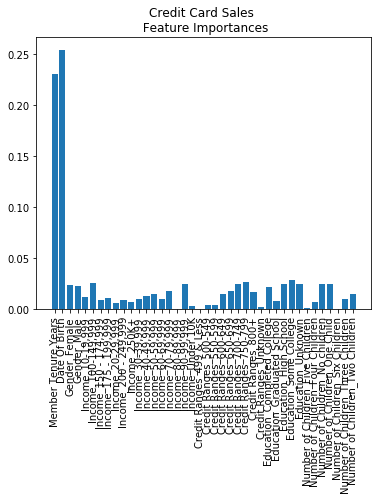

In [25]:
# RandomForestClassifier()
clf = clf_fit(X_train, y_train, RandomForestClassifier())
score = clf.score(X_test, y_test)
print("Score: %.5f" % score)
importance = clf.feature_importances_
plot_feature_importance(importance, '%s \n Feature Importances' % products_name[product_num])

In [27]:
##memb_tenure_data = data['Member Tenure Years'].dropna()
#memb_tenure_data = data['Date Of Birth'].dropna()
#print('Member Tenure Years ranges from %s to %s' % (memb_tenure_data.min(), memb_tenure_data.max()))
#memb_tenure_data.hist(bins=[i for i in range(0, 100, 10)])

In [28]:
# Filter by average tenure of households where at least one household member purchased the product
##tenure_data = pd.get_dummies(data[['Household Key', 'Member Tenure Years', product]].dropna(), columns=[product])
tenure_data = pd.get_dummies(data[['Household Key', 'Date Of Birth', product]].dropna(), columns=[product])
tenure_data['Date Of Birth'] = tenure_data['Date Of Birth'].str[:4].astype('int64').round(0)

##tenure_data1 = tenure_data[tenure_data[product+'_Y'] == 1].groupby(['Household Key', product+'_N', product+'_Y'])['Member Tenure Years'].mean()
tenure_data1 = tenure_data[tenure_data[product+'_Y'] == 1].groupby(['Household Key', product+'_N', product+'_Y'])['Date Of Birth'].mean()

##tenure_data0 = tenure_data[tenure_data[product+'_Y'] == 0].groupby(['Household Key', product+'_N', product+'_Y'])['Member Tenure Years'].mean()
tenure_data0 = tenure_data[tenure_data[product+'_Y'] == 0].groupby(['Household Key', product+'_N', product+'_Y'])['Date Of Birth'].mean()

tenure = pd.concat([tenure_data0, tenure_data1])
tenure_df = pd.DataFrame(tenure)
tenure_df = tenure_df.reset_index()
dup_hhs = tenure_df[tenure_df.duplicated(['Household Key'])]['Household Key']
dup_hhs_list = dup_hhs.tolist() # list of duplicate households

# Drop duplicate households that have not purchased the product
index_ids = []

for item in dup_hhs_list:
    temp = tenure_df[(tenure_df['Household Key'] == item) & (tenure_df[product+'_Y'] == 0)].index
    index_ids.append(temp[0])

##tenure_df['Member Tenure Years'] = tenure_df['Member Tenure Years'].astype('int64').round(0) 
tenure_df.drop(index_ids, inplace=True)
tenure_df.head()


,Household Key,FSV Credit Card Flag_N,FSV Credit Card Flag_Y,Date Of Birth
0,969.0,1,0,1943.500000
1,3338.0,1,0,1930.000000
2,8718.0,1,0,1952.000000
3,11524.0,1,0,1970.000000
4,13422.0,1,0,1949.666667


In [29]:
# Bin Member Tenure Years by decade and make into dummy variable
#tenure_df['Member Tenure Years Binned'] = pd.cut(x = tenure_df['Member Tenure Years'], bins = [0, 10, 20, 30, 40, 50, 60, 70])
#tenure_df = pd.get_dummies(tenure_df, columns = ['Member Tenure Years Binned'])
#tenure_df.head()

# Bin Member Tenure Years by vintile and make into dummy variable
##tenure_df['Member Tenure Years Binned'] = pd.qcut(x = tenure_df['Member Tenure Years'], duplicates='drop', q=22)
##tenure_df = pd.get_dummies(tenure_df, columns = ['Member Tenure Years Binned'])
##tenure_df.head()

# Bin Date Of Birth by vintile and make into dummy variable
tenure_df['Date Of Birth'] = tenure_df['Date Of Birth']
tenure_df['Date Of Birth Binned'] = pd.qcut(x = tenure_df['Date Of Birth'], q=20)
tenure_df = pd.get_dummies(tenure_df, columns = ['Date Of Birth Binned'])
tenure_df['Date Of Birth'] = tenure_df['Date Of Birth'].astype('int64')
tenure_df.head()

,Household Key,FSV Credit Card Flag_N,FSV Credit Card Flag_Y,Date Of Birth,"Date Of Birth Binned_(1919.999, 1926.0]","Date Of Birth Binned_(1926.0, 1929.0]","Date Of Birth Binned_(1929.0, 1931.0]","Date Of Birth Binned_(1931.0, 1934.0]","Date Of Birth Binned_(1934.0, 1936.0]","Date Of Birth Binned_(1936.0, 1938.111]",...,"Date Of Birth Binned_(1945.5, 1947.0]","Date Of Birth Binned_(1947.0, 1948.0]","Date Of Birth Binned_(1948.0, 1949.429]","Date Of Birth Binned_(1949.429, 1951.0]","Date Of Birth Binned_(1951.0, 1953.0]","Date Of Birth Binned_(1953.0, 1956.0]","Date Of Birth Binned_(1956.0, 1960.0]","Date Of Birth Binned_(1960.0, 1965.0]","Date Of Birth Binned_(1965.0, 1973.143]","Date Of Birth Binned_(1973.143, 1997.0]"
0,969.0,1,0,1943,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3338.0,1,0,1930,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8718.0,1,0,1952,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,11524.0,1,0,1970,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,13422.0,1,0,1949,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
# Define features and target
##X_new = tenure_df.drop(columns=['Household Key', 'Member Tenure Years', product+"_N", product+"_Y"])
X_new = tenure_df.drop(columns=['Household Key', 'Date Of Birth', product+"_N", product+"_Y"])
y_new = tenure_df[[product+"_Y"]]
print(y.shape)

features = np.array(X_new.columns)
print(features)
#X.groupby(['Household Key'])
X_new.head()

(3139, 1)
['Date Of Birth Binned_(1919.999, 1926.0]'
 'Date Of Birth Binned_(1926.0, 1929.0]'
 'Date Of Birth Binned_(1929.0, 1931.0]'
 'Date Of Birth Binned_(1931.0, 1934.0]'
 'Date Of Birth Binned_(1934.0, 1936.0]'
 'Date Of Birth Binned_(1936.0, 1938.111]'
 'Date Of Birth Binned_(1938.111, 1940.0]'
 'Date Of Birth Binned_(1940.0, 1942.0]'
 'Date Of Birth Binned_(1942.0, 1944.0]'
 'Date Of Birth Binned_(1944.0, 1945.5]'
 'Date Of Birth Binned_(1945.5, 1947.0]'
 'Date Of Birth Binned_(1947.0, 1948.0]'
 'Date Of Birth Binned_(1948.0, 1949.429]'
 'Date Of Birth Binned_(1949.429, 1951.0]'
 'Date Of Birth Binned_(1951.0, 1953.0]'
 'Date Of Birth Binned_(1953.0, 1956.0]'
 'Date Of Birth Binned_(1956.0, 1960.0]'
 'Date Of Birth Binned_(1960.0, 1965.0]'
 'Date Of Birth Binned_(1965.0, 1973.143]'
 'Date Of Birth Binned_(1973.143, 1997.0]']


,"Date Of Birth Binned_(1919.999, 1926.0]","Date Of Birth Binned_(1926.0, 1929.0]","Date Of Birth Binned_(1929.0, 1931.0]","Date Of Birth Binned_(1931.0, 1934.0]","Date Of Birth Binned_(1934.0, 1936.0]","Date Of Birth Binned_(1936.0, 1938.111]","Date Of Birth Binned_(1938.111, 1940.0]","Date Of Birth Binned_(1940.0, 1942.0]","Date Of Birth Binned_(1942.0, 1944.0]","Date Of Birth Binned_(1944.0, 1945.5]","Date Of Birth Binned_(1945.5, 1947.0]","Date Of Birth Binned_(1947.0, 1948.0]","Date Of Birth Binned_(1948.0, 1949.429]","Date Of Birth Binned_(1949.429, 1951.0]","Date Of Birth Binned_(1951.0, 1953.0]","Date Of Birth Binned_(1953.0, 1956.0]","Date Of Birth Binned_(1956.0, 1960.0]","Date Of Birth Binned_(1960.0, 1965.0]","Date Of Birth Binned_(1965.0, 1973.143]","Date Of Birth Binned_(1973.143, 1997.0]"
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Test accuracy (score): 0.88551
0.06026471680074771: 0, Score: 0.06026
0.036164262221417956: 1, Score: 0.03616
0.01816569859649669: 2, Score: 0.01817
0.0333893539096221: 3, Score: 0.03339
0.014221650092162473: 4, Score: 0.01422
0.05555265001767637: 5, Score: 0.05555
0.10964025808001077: 6, Score: 0.10964
0.025400872120118257: 7, Score: 0.02540
0.046444151509415964: 8, Score: 0.04644
0.06479092468182604: 9, Score: 0.06479
0.02873922913857943: 10, Score: 0.02874
0.01533894769086133: 11, Score: 0.01534
0.018649671550759986: 12, Score: 0.01865
0.01717054599217671: 13, Score: 0.01717
0.07665677741326177: 14, Score: 0.07666
0.03244889288857898: 15, Score: 0.03245
0.030219804592149555: 16, Score: 0.03022
0.05756578486935901: 17, Score: 0.05757
0.19908320289326242: 18, Score: 0.19908
0.06009260494151646: 19, Score: 0.06009


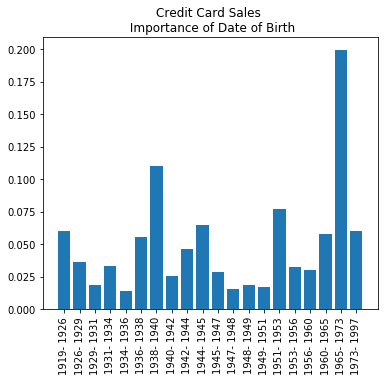

In [31]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new.values.ravel(), test_size=0.25, random_state=0)

# RandomForestClassifier() for Car Loan Sales
clf = clf_fit(X_train, y_train, RandomForestClassifier())
score = clf.score(X_test, y_test)
print("Test accuracy (score): %.5f" % score)
importance = clf.feature_importances_
plot_feature_importance(importance, '%s \n Importance of Date of Birth' % products_name[product_num])

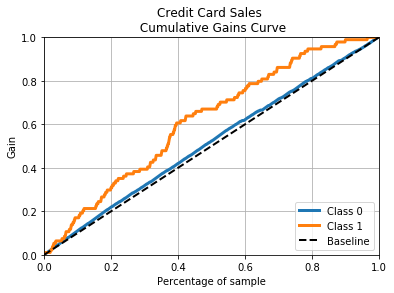

In [32]:
import scikitplot as skplt
# Deriving class probabilities
pred_probs = clf.predict_proba(X_test)
# Creating the plot
skplt.metrics.plot_cumulative_gain(y_test, pred_probs, title='%s \n Cumulative Gains Curve' % products_name[product_num])